<a href="https://colab.research.google.com/github/liberentaizp/Data_exploration/blob/main/Data_exploration_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA EXPLORATION**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#We want to see the full rows and columns of the outputs
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Do not truncate to fit screen width
pd.set_option('display.colheader_justify', 'left')  # Align column headers to the left



## *Loading the data*

First we **load the data** and make sure we have uploaded it okay by seeing the first 5 rows. The data can be loaded directly from a drive directory.


In [ ]:
data = '/content/drive/MyDrive/Libe/BLAST 60 genomes/gene_counts_and_metadata.xlsx'
df = pd.read_excel(data, header=0, index_col=0, engine='openpyxl')
df.head()

,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,Isolation matrix,Specific isolation matrix,More specific,Host,Pollution,Localization,ST Cluster,Bioremediation potential
strain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12917,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,2,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Clinical,Rectal,No,Human,No,France,15,35
991_21,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,2,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Clinical,Respiratory,Trachea,Human,No,Brazil,7,31
ABACB,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,Rhizosphere,Agricultural soil,Kiwi,Plant,No,New zeland,19,18
AHSWHJXPP1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Clinical,Urine,Lesion,Human,No,China,5,33
B001,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Soil,Sea,Sand,No,No,South Korea,12,23


## *Summary statistics of the data*
Once we are sure the data is loaded, we can see some **summary statistics** that will help with the downstream analysis

In [ ]:
df.describe()

,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,ST Cluster,Bioremediation potential
count,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.0,59.000000,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.915254,0.118644,0.796610,1.0,0.050847,0.203390,0.169492,0.254237,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.118644,0.576271,1.016949,0.050847,0.067797,0.050847,0.135593,0.067797,0.067797,0.338983,0.932203,0.406780,0.050847,0.372881,0.288136,0.050847,0.050847,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.898305,0.016949,0.644068,0.949153,0.983051,1.000000,0.423729,0.796610,0.084746,0.220339,0.101695,0.084746,0.101695,1.169492,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,1.0,1.0,1.423729,1.0,1.0,1.491525,1.016949,0.033898,0.271186,0.067797,0.084746,0.220339,0.101695,0.016949,0.016949,0.016949,0.016949,0.016949,0.050847,0.033898,0.016949,9.474576,25.372881
std,0.384534,0.326145,0.405975,0.0,0.221572,0.405975,0.378406,0.439169,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.326145,0.648696,0.130189,0.221572,0.253555,0.221572,0.345295,0.253555,0.253555,1.027387,0.253555,0.672582,0.221572,0.640536,0.588711,0.289097,0.289097,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.356947,0.130189,0.482905,0.221572,0.130189,0.491304,0.593162,0.405975,0.280894,0.527447,0.304841,0.280894,0.304841,2.043936,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.0,0.0,0.531860,0.0,0.0,0.537327,0.130189,0.182521,0.551815,0.253555,0.280894,0.527447,0.304841,0.130189,0.130189,0.130189,0.130189,0.130189,0.289097,0.182521,0.130189,5.969335,8.419801
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
25%,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,

## *Check missing values*

First of all we want to check for **missing values** that could hinder our analysis.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

BenR                         0
PobA                         0
alkB                         0
amoA                         0
arsC                         0
arsR1                        0
bcsA                         0
bcsB                         0
bnzA                         0
bphA1                        0
bphA2                        0
bphA3                        0
bphA4                        0
bphB                         0
bphC                         0
bphD                         0
chR                          0
copA                         0
copA1                        0
dmpK                         0
dmpL                         0
dmpM                         0
dmpN                         0
dmpO                         0
dmpP                         0
intl1                        0
katA                         0
merA                         0
merB                         0
merR                         0
merT                         0
mrdH                         0
mreA    

Depending on the results of the missing values we will take different approaches. If we don't have missing values we can continue with the analysis.

If not, we should consider:

*   **Removing** rows or columns with missing values if they could be more misinforming than informing

```
df.dropna(inplace=True)  # Removes any rows with missing values

```

*   **Fill** missing values with specific value (mean, median...)

```
df.fillna(df.mean(), inplace=True)  # Replaces missing values with the column mean
```

*   **Forward or backward** filling, where we fill the missing values with the previous or posterior value in the column

```
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill

```

*   Using **interpolation** to estimate missing values, estimating the missing data by creating a smooth curve or line through known points

```
df.interpolate(method='linear', inplace=True)  # Linear interpolation

```





## *Numerical dataset*
For posterior analyses like clustering, we will need to only use the **numerical variables of the dataset**, so we will create a new dataset that will only contain the numeridal data called ***df_numeric***. For this we will have to write all the categorical features that we want to drop from the df dataset.

Also, for the downstream analysis, we will create another dataset that will only contain the gene counts of the database, called ***df_genecounts***.

We will consider ST Cluster as a categorical dataset, as the numbers in it do not represent real quantities, but categories.

In [ ]:
df_numeric=df.drop(['Isolation matrix','Specific isolation matrix','More specific','Host','Pollution','Localization', 'ST Cluster'], axis=1)
df_numeric.head()


,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,Bioremediation potential
strain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12917,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,2,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35
991_21,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,2,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,31
ABACB,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18
AHSWHJXPP1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,33
B001,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23


In [ ]:
df_genecount=df.drop(['Isolation matrix','Specific isolation matrix','More specific','Host','Pollution','Localization','ST Cluster','Bioremediation potential'], axis=1)
df_genecount.head()

,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW
strain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12917,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,2,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991_21,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,2,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ABACB,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0
AHSWHJXPP1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
B001,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_numeric.describe()

,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,Bioremediation potential
count,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.0,59.000000,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.915254,0.118644,0.796610,1.0,0.050847,0.203390,0.169492,0.254237,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.118644,0.576271,1.016949,0.050847,0.067797,0.050847,0.135593,0.067797,0.067797,0.338983,0.932203,0.406780,0.050847,0.372881,0.288136,0.050847,0.050847,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.898305,0.016949,0.644068,0.949153,0.983051,1.000000,0.423729,0.796610,0.084746,0.220339,0.101695,0.084746,0.101695,1.169492,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,0.033898,1.0,1.0,1.423729,1.0,1.0,1.491525,1.016949,0.033898,0.271186,0.067797,0.084746,0.220339,0.101695,0.016949,0.016949,0.016949,0.016949,0.016949,0.050847,0.033898,0.016949,25.372881
std,0.384534,0.326145,0.405975,0.0,0.221572,0.405975,0.378406,0.439169,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.326145,0.648696,0.130189,0.221572,0.253555,0.221572,0.345295,0.253555,0.253555,1.027387,0.253555,0.672582,0.221572,0.640536,0.588711,0.289097,0.289097,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.356947,0.130189,0.482905,0.221572,0.130189,0.491304,0.593162,0.405975,0.280894,0.527447,0.304841,0.280894,0.304841,2.043936,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.182521,0.0,0.0,0.531860,0.0,0.0,0.537327,0.130189,0.182521,0.551815,0.253555,0.280894,0.527447,0.304841,0.130189,0.130189,0.130189,0.130189,0.130189,0.289097,0.182521,0.130189,8.419801
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0

## *Standarization (scaling) of data*

Some of the downstream analysis methods will need **standarized data**, as they are sensitive to scale of features (K-means, DBSCAN...).

Because of this, we will create another data frame called ***df_numeric_scaled*** where all the numeric features are standarized.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)  # Standardize the data (mean=0, std=1)

When we scale our data using any scaled from sklearn (as StandardScaled), the output is a NumPy array rather than a pandas DataFrame.


In [ ]:
print(type(df_numeric_scaled))

<class 'numpy.ndarray'>



However, as we want to visualize the scaled data using different plots, we should convert it back to a DataFrame for better manipulation.

In [ ]:
df_numeric_scaled_df = pd.DataFrame(df_numeric_scaled, columns=df_numeric.columns)
print(type(df_numeric_scaled_df))
df_numeric_scaled_df


<class 'pandas.core.frame.DataFrame'>


,BenR,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,Bioremediation potential
0,0.222277,-0.366900,0.505291,0.0,-0.231455,-0.505291,2.213594,1.712698,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.366900,0.658808,-0.131306,-0.231455,-0.269680,-0.231455,-0.396059,-0.269680,-0.269680,0.648919,0.269680,2.389144,4.320494,2.562050,2.932777,-0.177394,-0.177394,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,0.287348,-0.131306,0.743392,0.231455,0.131306,0.000000,2.680215,0.505291,-0.304290,-0.421332,-0.336463,-0.304290,-0.336463,0.903268,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,0.0,0.0,-0.803530,0.0,0.0,0.954427,-0.131306,-0.187317,-0.495663,-0.269680,-0.304290,-0.421332,-0.336463,-0.131306,-0.131306,-0.131306,-0.131306,-0.131306,-0.177394,-0.187317,-0.131306,1.153205
1,0.222277,-0.366900,-1.979057,0.0,-0.231455,-0.505291,-0.451754,1.712698,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.366900,-0.895979,-0.131306,-0.231455,-0.269680,-0.231455,-0.396059,-0.269680,-0.269680,3.594015,0.269680,0.889575,-0.231455,0.987457,-0.493636,-0.177394,-0.177394,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-2.538240,-0.131306,-1.345185,0.231455,0.131306,0.000000,-0.720488,0.505291,-0.304290,-0.421332,-0.336463,-0.304290,-0.336463,2.383623,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,0.0,0.0,1.092801,0.0,0.0,0.954427,-0.131306,-0.187317,1.332093,-0.269680,-0.304290,-0.421332,-0.336463,-0.131306,-0.131306,-0.131306,-0.131306,-0.131306,-0.177394,-0.187317,-0.131306,0.674056
2,-2.400593,-0.366900,-1.979057,0.0,-0.231455,-0.505291,2.213594,-0.583874,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.366900,-0.895979,-0.131306,-0.231455,-0.269680,-0.231455,-0.396059,-0.269680,-0.269680,-0.332779,-3.708099,-0.609994,-0.231455,-0.587137,-0.493636,-0.177394,-0.177394,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-2.538240,-0.131306,0.743392,0.231455,0.131306,0.000000,-0.720488,0.505291,-0.304290,-0.421332,-0.336463,-0.304290,-0.336463,-0.577088,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,0.0,0.0,-0.803530,0.0,0.0,0.954427,-0.131306,-0.187317,3.159849,-0.269680,-0.304290,-0.421332,-0.336463,-0.131306,-0.131306,-0.131306,-0.131306,-0.131306,-0.177394,-0.187317,-0.131306,-0.883176
3,0.222277,-0.366900,0.505291,0.0,-0.231455,-0.505291,-0.451754,-0.583874,5.338539,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.366900,-0.895979,-0.131306,-0.231455,-0.269680,-0.231455,-0.396059,-0.269680,-0.269680,1.630618,0.269680,-0.609994,-0.231455,-0.587137,-0.493636,-0.177394,-0.177394,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,0.287348,-0.131306,0.743392,0.231455,0.131306,0.000000,-0.720488,0.505291,-0.304290,-0.421332,-0.336463,-0.304290,-0.336463,-0.083636,5.338539,5.338539,5.338539,5.338539,5.338539,5.338539,5.338539,5.338539,0.0,0.0,-0.803530,0.0,0.0,-0.922613,-0.131306,5.338539,3.159849,-0.269680,-0.304290,-0.421332,-0.336463,-0.131306,-0.131306,-0.131306,-0.131306,-0.131306,-0.177394,-0.187317,-0.131306,0.913631
4,0.222277,-0.366900,0.505291,0.0,-0.231455,1.979057,-0.451754,-0.583874,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.187317,-0.366900,-0.895979,7.615773,-0.231455,-0.269680,-0.231455,2.524876,-0.269680,-0.269680,-0.332779,0.269680,-0.609994,-0.23

## *Check for outliers*

After scaling the data, we should observe if our dataset contains outliers that could potentially affect the posterior analysis.
Outliers can create misleading results in some of the posterior approaches.

First we will create a new df called ***df_numeric_scaled_no_outliers*** that will contain the numeric scaled data with no outliers. Then we will build a boxplot for df_numeric_scaled and another one for df_numeric_scaled_no_outliers, as to see if the outliers have been correctly removed.

In [ ]:
from scipy import stats
#Create df without outliers
z_scores = np.abs(stats.zscore(df_numeric)) #calculates z-scores
outlier_mask = (z_scores > 3).any(axis=1) #identifies outliers using Z-score threshold of 3
df_numeric_no_outliers = df_numeric[~outlier_mask] #Creates a dataframe without outliers

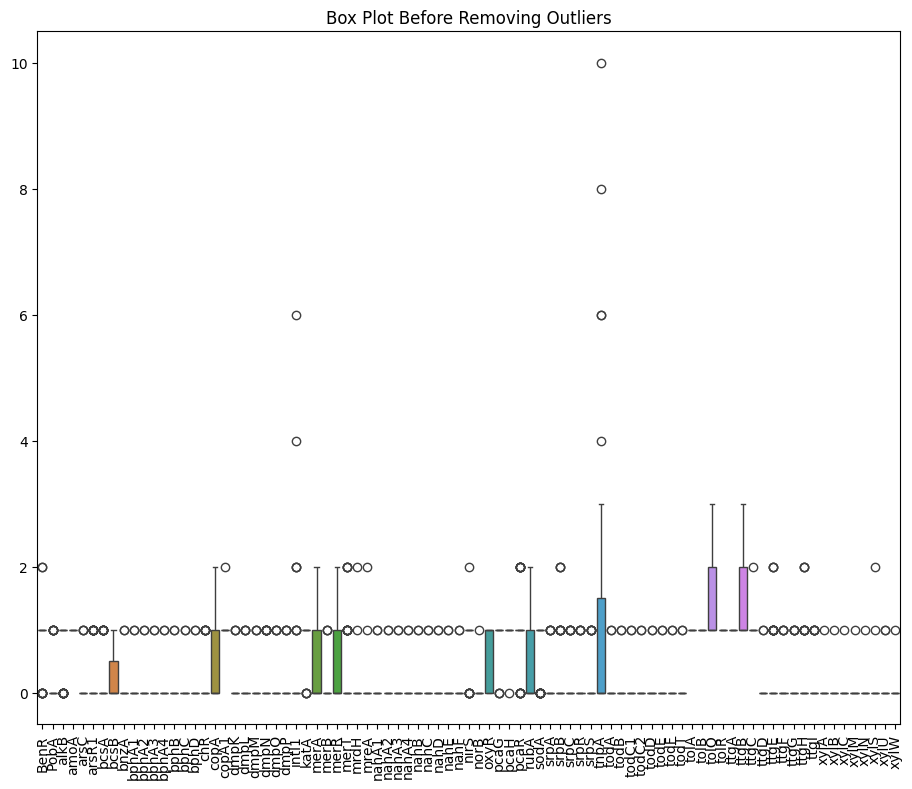

In [ ]:
#Boxplots for df_numeric_scaled and df_numeric_scaled_no_outliers
plt.figure(figsize=(18, 8))  # Adjusted width for wider boxplots
# Box plot before removing outliers
plt.subplot(1, 2, 1)
#we want the df_numeric without Bioremediation potential
sns.boxplot(data=df_genecount)
plt.title('Box Plot Before Removing Outliers')
plt.xticks(ticks=np.arange(len(df_genecount.columns)), labels=df_genecount.columns, rotation=90, ha='center')

# Box plot after removing outliers
#plt.subplot(1, 2, 2)
#sns.boxplot(data=df_numeric_no_outliers)
#plt.title('Box Plot After Removing Outliers')
#plt.xticks(ticks=np.arange(len(df_numeric_no_outliers.columns)), labels=df_numeric_no_outliers.columns, rotation=90, ha='center')#

plt.tight_layout()  # Adjust layout to prevent overlap


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


As we now know which data points are the outliers, we will also create a dataframe called ***df_numeric_no_outliers*** that does not include the outliers.

In [ ]:
z_scores = np.abs(stats.zscore(df_numeric)) #calculates z-scores
outlier_mask = (z_scores > 3).any(axis=1) #identifies outliers using Z-score threshold of 3
df_numeric_no_outliers = df_numeric[~outlier_mask] #Creates a dataframe without outliers

## *Correlation analysis*
The next step is to assess relationships between features. Are they correlated? Does one feature influence another?

A **correlation analysis** reveals linear relationships, helping us identify redundant features (those that convey similar information). When features are highly correlated, we can choose to keep both, remove one, or combine them into a new, more informative feature. This simplifies the data, avoids overfitting and improves model performance.

In order to obtain a meaningful interpretation of the correlation analysis, we will perform it using the original numeric data (no scaled). Regarding the **outliers**, the best approach would be to visualize the correlation matrix with (correlation_matrix_w_out) and without (correlation_matrix_no_out) the previously detected outliers in the dataframe.

In our case, we will perform a correlation matrix and visualize it in a heatmap for df_numeric and df_numeric_no_outliers.

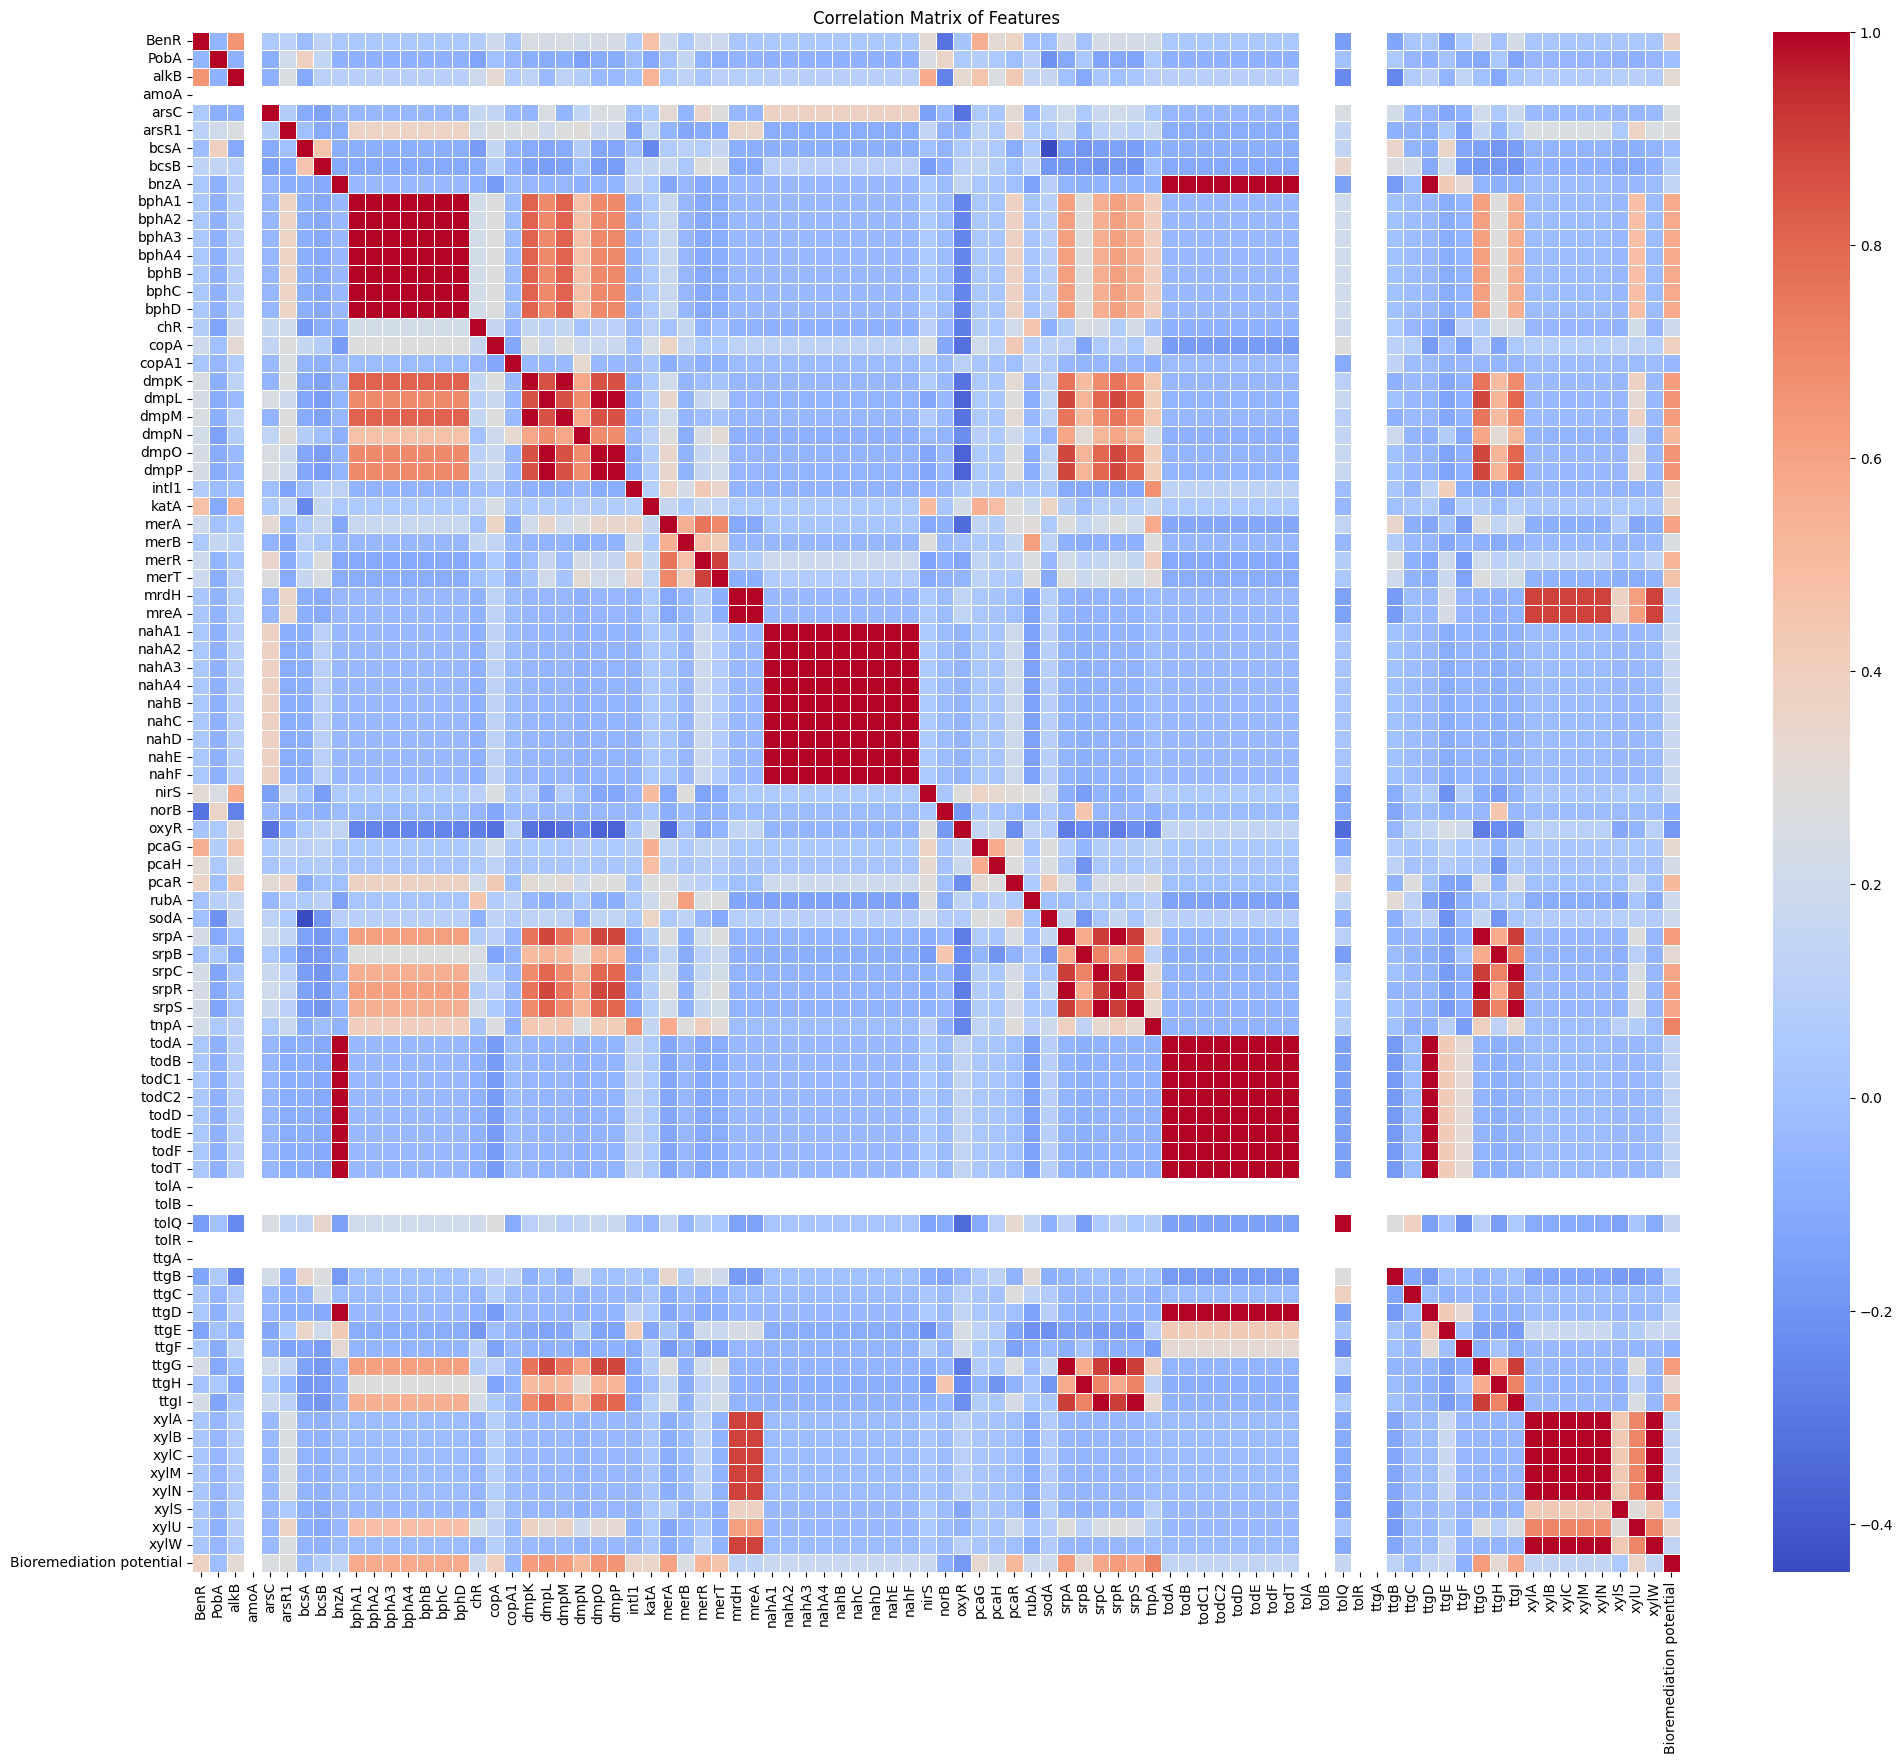

In [ ]:
correlation_matrix_w_out = df_numeric.corr(method='pearson')
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix_w_out, vmin=None, vmax=None, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

If the correlation matrix changes drastically with and without outliers, this means that the outliers have a large influence in the relationship between features. A revision of the outliers would be recommended. There are two options if the outliers affect the correlatino amtrix:

*   **Remove the outliers** if they are caused by errors, when they do not have biological relevance or when they do not represent the target population.
*   EIf we do not want to remove the outliers because we think they might be relevant for the analysis, we could use other **more robust correlation analysis methods** as Spearman's correlation or KEndall's Tau.

In our case, we will continue with our numeric dataframe without outliers.


## *Dimensionality reduction*

Dimensionality reduction will reduce the number of features in the data and simplify it while retaining important patterns.

For this we will use two methods:


*   *PCA*: Reduces dimensionality in a **linear** way. If the data has some inherent linear patterns it will reduce the complexity while keeping most of the variance. It will be used in the downstream clustering analysis.
*   *t-SNE*: Reduces dimensionality in a **non-linear** way. It is used for visualizing local patterns and clusters in complex data.


For bothe methods we will use the numeric and scaled df with no outliers: **df_numeric_scaled_no_outliers**


In [ ]:
print(df_numeric)

            BenR  PobA  alkB  amoA  arsC  arsR1  bcsA  bcsB  bnzA  bphA1  bphA2  bphA3  bphA4  \
strain                                                                                          
12917       1     0     1     1     0     0      1     1     0     0      0      0      0       
991_21      1     0     0     1     0     0      0     1     0     0      0      0      0       
ABACB       0     0     0     1     0     0      1     0     0     0      0      0      0       
AHSWHJXPP1  1     0     1     1     0     0      0     0     1     0      0      0      0       
B001        1     0     1     1     0     1      0     0     0     0      0      0      0       
BIRD-1      1     0     1     1     0     0      0     0     0     0      0      0      0       
C4B10       1     0     1     1     0     0      0     0     0     0      0      0      0       
C4E12       1     0     1     1     0     0      0     1     0     0      0      0      0       
CBF10-2     1     1     0     

Explained variance (weights) in percentages for each component: [88.67753548  3.10194773]


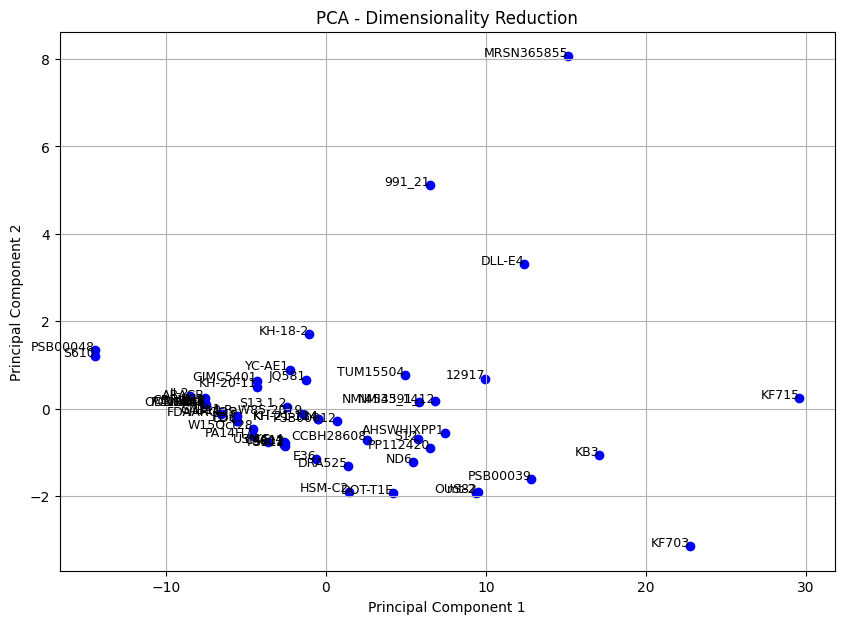

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Needed to format the output nicely

# Assuming df_numeric is your scaled numeric DataFrame
# Run PCA on scaled numeric data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_numeric)

# Plot PCA results with data labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b')
plt.title('PCA - Dimensionality Reduction')

# Add data labels (replace 'df.index' with the correct label names if needed)
for i, name in enumerate(df_numeric.index):  # assuming `df_numeric` has row indices as names
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9, ha='right')

# Explained variance ratio (weights) in percentages
explained_variance_percent = pca.explained_variance_ratio_ * 100
print("Explained variance (weights) in percentages for each component:", explained_variance_percent)

# Loadings in percentages with feature names
loadings_percent = pca.components_ * 100
feature_names = df_numeric.columns  # Assuming `df_numeric` is a DataFrame

# Create a DataFrame to associate feature names with loadings
# loadings_df = pd.DataFrame(loadings_percent.T, index=feature_names, columns=['Component 1', 'Component 2'])
# print("\nPrincipal components (loadings) with feature names:")
# print(loadings_df)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



We can see that the Principal Component Analysis does not show any significant grouping in the dataset. However, we can see that some strains show very different patterns.
In order to see if these different strains come from similar isolation amtrixes, we will repeat the PCA showing the isolation matrix of each strain.

Explained variance (weights) in percentages for each component: [88.67753548  3.10194773]

Principal components (loadings) with feature names:
                          Component 1   Component 2 
BenR                      1.672640e+00 -2.276843e+00
PobA                     -3.411378e-02  1.254312e+00
alkB                      1.452056e+00 -4.523865e+00
amoA                     -1.355253e-18  1.110223e-14
arsC                      6.518603e-01 -2.227151e+00
arsR1                     1.325356e+00 -3.753005e+00
bcsA                     -1.012341e-01 -9.011308e-01
bcsB                      3.999934e-01 -1.014018e-01
bnzA                      2.700404e-01 -1.651928e+00
bphA1                     1.213570e+00 -1.923410e+00
bphA2                     1.213570e+00 -1.923410e+00
bphA3                     1.213570e+00 -1.923410e+00
bphA4                     1.213570e+00 -1.923410e+00
bphB                      1.213570e+00 -1.923410e+00
bphC                      1.213570e+00 -1.923410e+00
bphD     

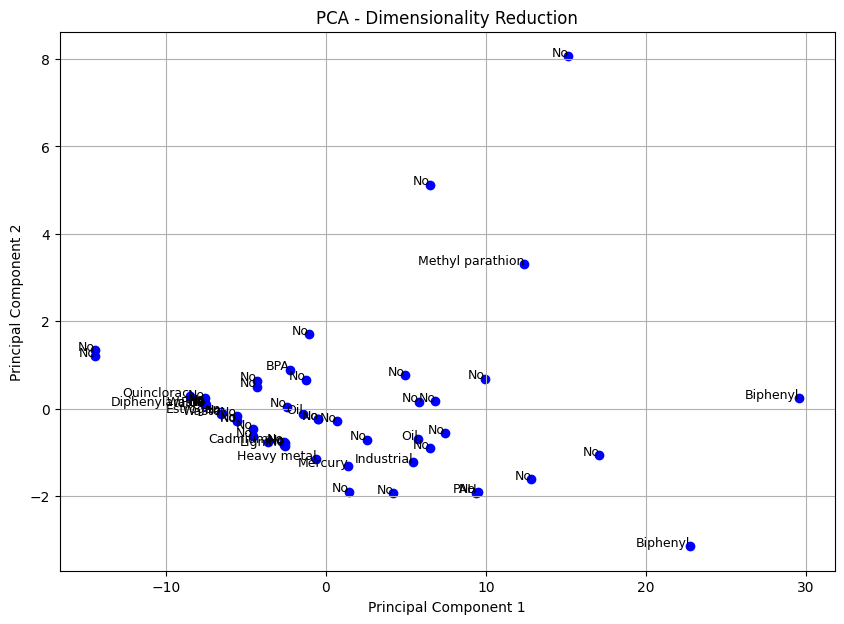

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Needed to format the output nicely

# Assuming df_numeric is your scaled numeric DataFrame
# Run PCA on scaled numeric data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_numeric)

# Plot PCA results with data labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b')
plt.title('PCA - Dimensionality Reduction')

# Add data labels (replace 'df.index' with the correct label names if needed)
for i, name in enumerate(df['Pollution']):  # assuming `df_numeric` has row indices as names
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9, ha='right')

# Explained variance ratio (weights) in percentages
explained_variance_percent = pca.explained_variance_ratio_ * 100
print("Explained variance (weights) in percentages for each component:", explained_variance_percent)

# Loadings in percentages with feature names
loadings_percent = pca.components_ * 100
feature_names = df_numeric.columns  # Assuming `df_numeric` is a DataFrame

# Create a DataFrame to associate feature names with loadings
loadings_df = pd.DataFrame(loadings_percent.T, index=feature_names, columns=['Component 1', 'Component 2'])
print("\nPrincipal components (loadings) with feature names:")
print(loadings_df)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


We see that in the PCAs the most influential features in each component are the Cluster and the Bioremediation potential features. These have much higher values than all the other features, as they do not measure gene counts.

We will now perform a PCA in our df_genecounts dataset.

Explained variance (weights) in percentages for each component: [40.74756445 10.7439862 ]

Principal components (loadings) with feature names:
       Component 1   Component 2 
BenR   4.010470e+00 -4.280678e+00
PobA   3.183463e-01  1.478197e+00
alkB   1.984088e+00 -9.940869e-01
amoA  -3.469447e-16 -1.110223e-14
arsC   1.058099e+00 -2.897286e+00
arsR1  2.475974e+00 -8.695511e+00
bcsA  -1.064937e+00  6.173575e+00
bcsB   4.863526e-01  9.766832e+00
bnzA  -4.644960e-01  3.309083e+00
bphA1  3.096807e+00 -9.451724e+00
bphA2  3.096807e+00 -9.451724e+00
bphA3  3.096807e+00 -9.451724e+00
bphA4  3.096807e+00 -9.451724e+00
bphB   3.096807e+00 -9.451724e+00
bphC   3.096807e+00 -9.451724e+00
bphD   3.096807e+00 -9.451724e+00
chR    6.626035e-01 -7.235422e+00
copA   8.053694e+00 -9.754063e+00
copA1 -4.400141e-01 -6.371331e-02
dmpK   4.200350e+00 -1.351688e+01
dmpL   4.788103e+00 -1.625118e+01
dmpM   4.200350e+00 -1.351688e+01
dmpN   4.558441e+00 -1.405581e+01
dmpO   4.788103e+00 -1.625118e+01
dmpP   

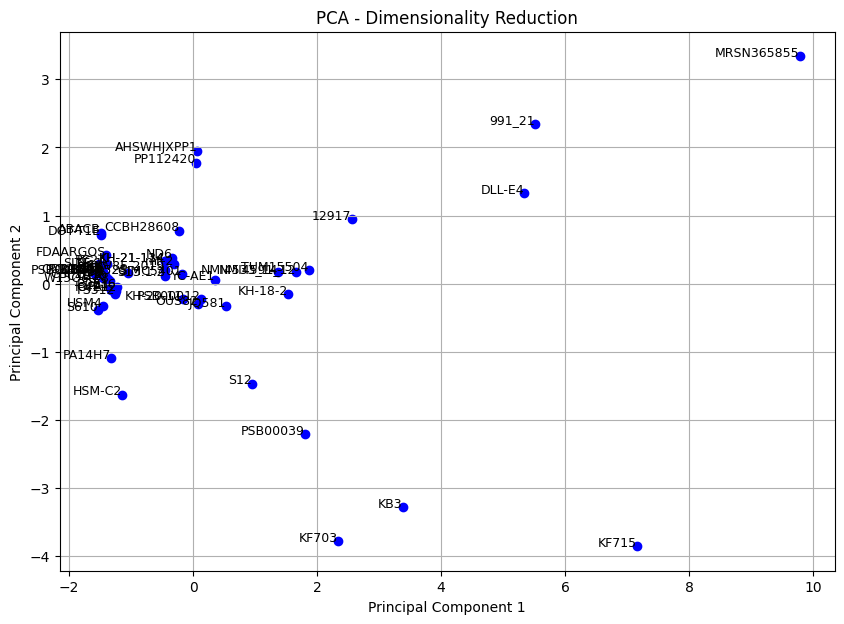

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Needed to format the output nicely

# Assuming df_numeric is your scaled numeric DataFrame
# Run PCA on scaled numeric data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_genecount)

# Plot PCA results with data labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b')
plt.title('PCA - Dimensionality Reduction')

# Add data labels (replace 'df.index' with the correct label names if needed)
for i, name in enumerate(df_genecount.index):  # assuming `df_numeric` has row indices as names
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9, ha='right')

# Explained variance ratio (weights) in percentages
explained_variance_percent = pca.explained_variance_ratio_ * 100
print("Explained variance (weights) in percentages for each component:", explained_variance_percent)

# Loadings in percentages with feature names
loadings_percent = pca.components_ * 100
feature_names = df_genecount.columns  # Assuming `df_numeric` is a DataFrame

# Create a DataFrame to associate feature names with loadings
loadings_df = pd.DataFrame(loadings_percent.T, index=feature_names, columns=['Component 1', 'Component 2'])
print("\nPrincipal components (loadings) with feature names:")
print(loadings_df)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Explained variance (weights) in percentages for each component: [40.74756445 10.7439862 ]


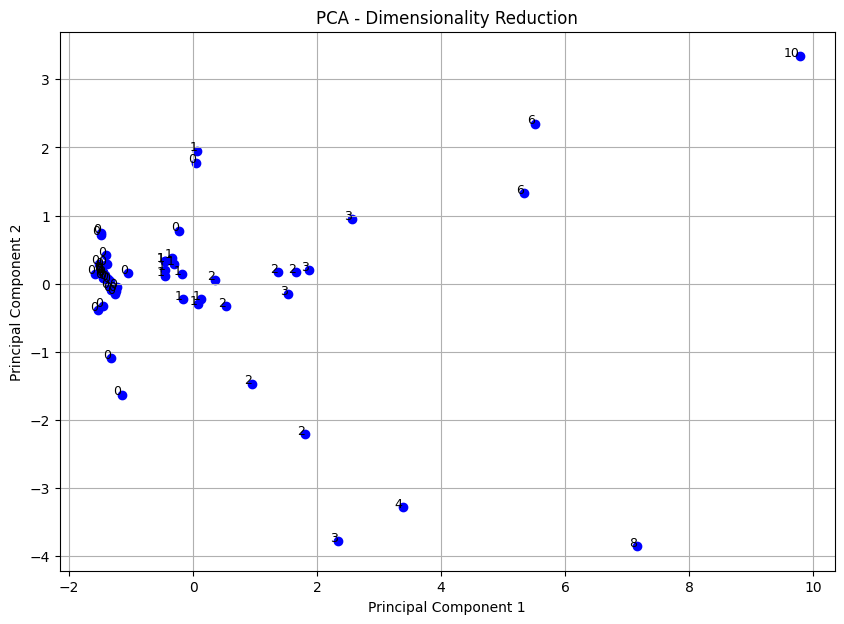

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Needed to format the output nicely

# Assuming df_numeric is your scaled numeric DataFrame
# Run PCA on scaled numeric data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_genecount)

# Plot PCA results with data labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b')
plt.title('PCA - Dimensionality Reduction')

# Add data labels (replace 'df.index' with the correct label names if needed)
for i, name in enumerate(df['tnpA']):  # assuming `df_numeric` has row indices as names
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9, ha='right')

# Explained variance ratio (weights) in percentages
explained_variance_percent = pca.explained_variance_ratio_ * 100
print("Explained variance (weights) in percentages for each component:", explained_variance_percent)

# Loadings in percentages with feature names
loadings_percent = pca.components_ * 100
feature_names = df_genecount.columns  # Assuming `df_numeric` is a DataFrame

# Create a DataFrame to associate feature names with loadings
# loadings_df = pd.DataFrame(loadings_percent.T, index=feature_names, columns=['Component 1', 'Component 2'])
# print("\nPrincipal components (loadings) with feature names:")
# print(loadings_df)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In this second PCA we can see that strains collected from Rhizospheres appear grouped together, however, clinical, water and soil samples appear intertwined with each other. ***This denotes that the isolation matrix of each strain is not definitive of their gene composition????????????.***

When we seethe actual composition of the PCA axes, we see that the most weighed features in the PCA are: tnpA (17) and Bioremediation potential (97).

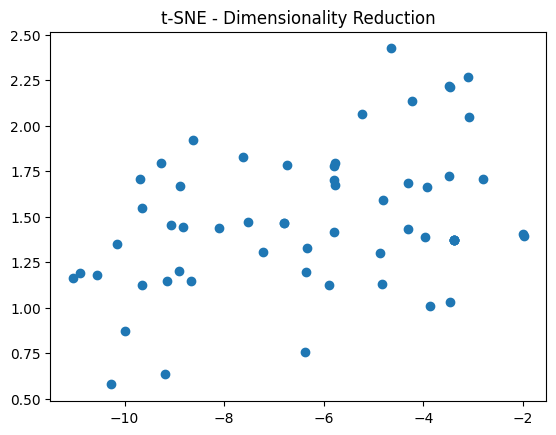

In [ ]:
# Apply t-SNE on scaled data without outliers
n_samples = df_numeric.shape[0]  # Number of rows in the dataset
tsne = TSNE(n_components=2, perplexity=min(30, n_samples - 1), random_state=42) # Set perplexity to something smaller than the number of samples

X_tsne = tsne.fit_transform(df_numeric)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE - Dimensionality Reduction')
plt.show()

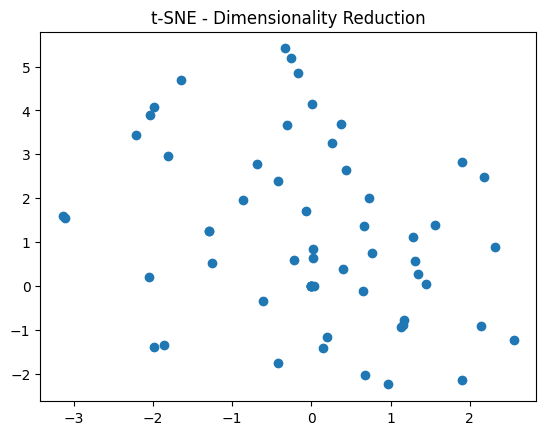

In [ ]:
# Now the samt t-SNE but with df_genecoutns
n_samples = df_genecount.shape[0]  # Number of rows in the dataset
tsne = TSNE(n_components=2, perplexity=min(30, n_samples - 1), random_state=42) # Set perplexity to something smaller than the number of samples

X_tsne = tsne.fit_transform(df_genecount)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE - Dimensionality Reduction')
plt.show()

## *Clustering*
The next step in the data exploratory analysis is the **clusterization** of the data. This type of unsupervised learning can help find patterns in the data that are not visible to the human eye. The numerical features of the database are clusterized depending on the algorithm of each clusterization method, and by seeing what data points are grouped together we mught be able to see some hidden patterns. Clusterization can also help with noise reduction and hypothesis generation.

In our case, we will use the k-means method and the DBSCAN method for clusterization.



### K-means clustering

This type of clustering clusters the data points into K distinct non-overlapping subsets. K-means assigns each data point to the nearest centroid based on Euclidean distance. After this, the method updates the point assignment repeatedly until the centroids do not change significantly.

Pros:

*   Simple and efficient
*   Scalable to large datasets

Cons:

*   We have to choose K
*   Assumption of spherical and similar-size clusters
*   Sensivity to outliers
*   No suitable for categorical data

So, to perform K-means clustering we have to determine the optimal number of clusters, and for that we eill use the elbow method.

Text(0.5, 1.0, 'Elbow Method for Optimal K')

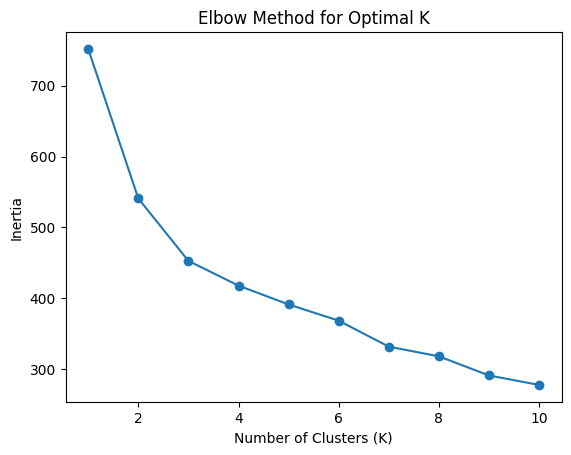

In [ ]:
#Determine the range of K-values to test
K_range = range(1, 11)  # Test K values from 1 to 10
inertia = []  # To store the inertia for each K

#Calculate K-means for each K and store the inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize K-means with K clusters
    kmeans.fit(df_genecount)  # Fit K-means to the data
    inertia.append(kmeans.inertia_)  # Store the inertia for this K

# Plot the elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

We have to find the elbow point in the curve, the point where the plot come descending and proceeds to descend a little less. That will be our optimal k-number.

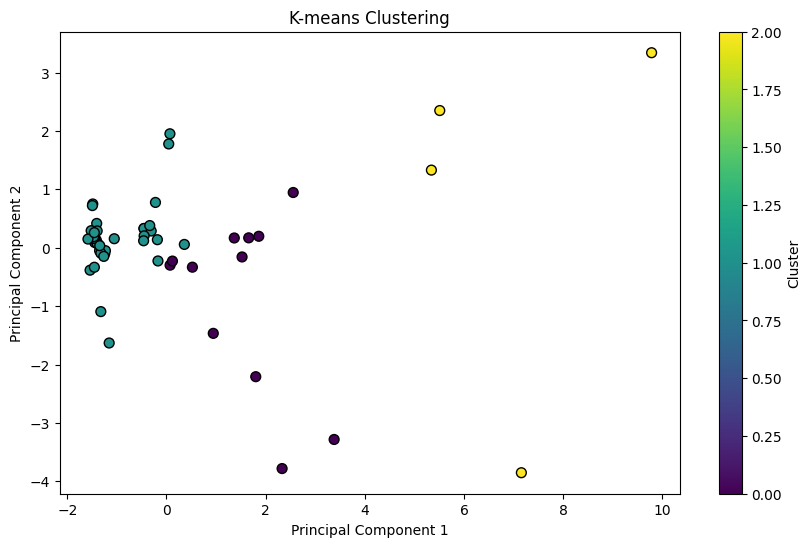

In [ ]:
#Fit the k-means model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_genecount)

#Add the cluster labels to the original dataframe
df_genecount['Cluster'] = kmeans.labels_

#Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Now we will get the samples that are contained in each cluster.

In [ ]:
for cluster_num in range(optimal_k):
  samples_in_cluster = df_genecount[df_genecount['Cluster'] == cluster_num]
  #Use the indices to get strain names from the original DataFrame
  print("Samples in Cluster " + str(cluster_num) + ':')
  for index in samples_in_cluster.index.tolist():
    strain_name = df.loc[index, 'Isolation matrix']
    print(strain_name)


Samples in Cluster 0:
Clinical
Water
Soil
Soil
Water
Clinical
Clinical
Soil
Clinical
Clinical
Soil
Clinical
Samples in Cluster 1:
Rhizosphere
Clinical
Soil
Rhizosphere
Rhizosphere
Rhizosphere
Soil
Clinical
Water
Water
Soil
Rhizosphere
Clinical
Water
Clinical
Soil
Soil
Water
Soil
Soil
Water
Water
Water
Rhizosphere
Water
Soil
Rhizosphere
Water
Water
Rhizosphere
Rhizosphere
Rhizosphere
Rhizosphere
Rhizosphere
Clinical
Clinical
Rhizosphere
Rhizosphere
Water
Water
Rhizosphere
Water
Soil
Samples in Cluster 2:
Clinical
Soil
Soil
Clinical


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN groups data points based on their density. It can find clusters of arbitrary shapes and is useful for datasets with noise and outliers. It uses two aprameters for this:
*    *eps*: maximum distance between two points to be considered in the same cluster
*    *min_samples*: the minimum number of points required to form a cluster

This type of clustering would be preferred if non-linear relationsips between features could be observed in the tSNE analysis.

Pros:
*    Determines number of clusters
*   Can detect outliers and find clusters of arbitrary shapes
*    Handles better non-linear data

Cons:
*    Not as scalable for large datasets
*    Results can be sensitive to choice of parameters (eps and min_samples)
*    Struggles when clusters vary in density

Before starting, we have to choose the parameter's values.

For the min_samples, a common rule of thumb is to set it to the number of dimensions in our dataset + 1. This is: number of features + 1.

For the eps, we can plot a K-distance graph, which is to compute the distance of each point in our dataset to its k-th nearest neighbour. We will sort these distances and plot them, and the elbow point will decide the eps value. For this we will need the min_sample value.

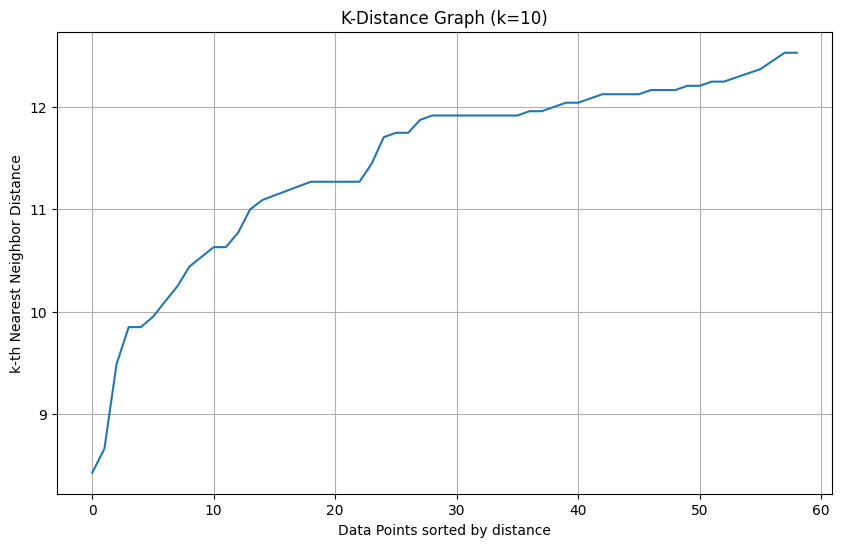

In [ ]:
min_samples = min(df_genecount.shape[1] + 1, df_genecount.shape[0])
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_genecount)
distances, indices = neighbors_fit.kneighbors(df_genecount)

# Sort distances to plot the K-distance graph
k_distances = np.sort(distances[:, -1])  # Take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-th Nearest Neighbor Distance')
plt.title(f'K-Distance Graph (k={k})')
plt.grid()
plt.show()

Now that we know our parameter's values, we can do the DBSCAN.

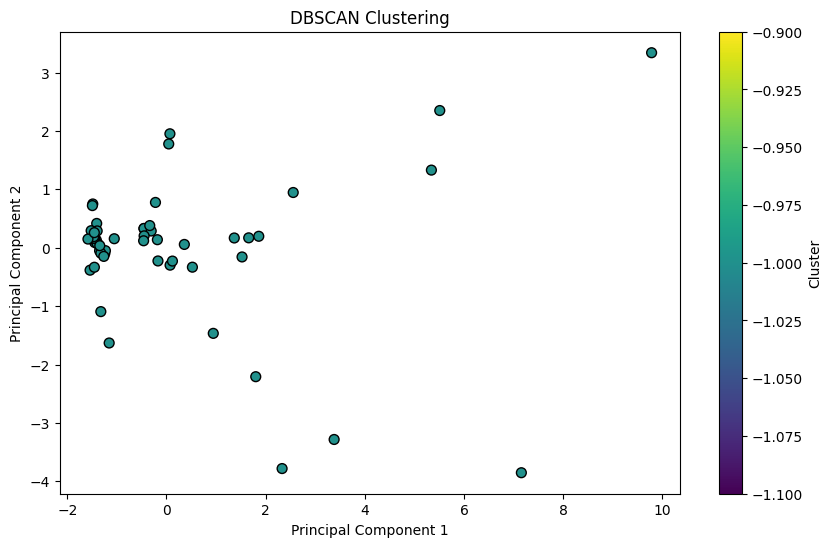

In [ ]:
eps_value = 4
min_samples = df_numeric.shape[1] + 1

dbscan = DBSCAN(eps=eps_value, min_samples = min_samples)
dbscan_labels = dbscan.fit_predict(df_numeric)

#Add the cluster labels to the original dataframe
df_numeric['DBSCAN_Cluster'] = dbscan_labels

#Visualize results
plt.figure(figsize=(10, 6))
#in DBSCAN we will also use the pca results, as this agorithm can handle the original scaled data, but if we want to visualize it we need it to be two dimensional
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# **DATA MODELLING**

## RANDOM FOREST


In [ ]:
# Import necessary libraries
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows in DataFrame output
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn import metrics
import numpy as np


In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Libe/BLAST 60 genomes/gene_counts_and_metadata.xlsx'
df = pd.read_excel(data_path, engine='openpyxl')


Mounted at /content/drive


In [ ]:
# Step 1: Data Preprocessing
# Separate target variables and select all feature columns, including metadata and gene-related counts
target = 'Bioremediation potential'  # Replace with actual target name for Model 1


In [ ]:
# Identify metadata columns and numeric gene count columns
metadata_columns = ["strain", "Isolation matrix", "Specific isolation matrix",
                   "More specific", "Host", "Pollution", "Localization", "ST Cluster"]  # Categorical/non-numeric metadata columns
numeric_columns = df.select_dtypes(include=np.number).columns.drop([target, "ST Cluster"])

In [ ]:
# Encode categorical metadata using one-hot encoding
df_encoded = pd.get_dummies(df, columns=metadata_columns, dtype='int')

# Now we will drop all columns that start with strain_
df_encoded = df_encoded[df_encoded.columns.drop(list(df_encoded.filter(regex='strain_')))]

In [ ]:
df_encoded.head()


,PobA,alkB,amoA,arsC,arsR1,bcsA,bcsB,BenR,bnzA,bphA1,bphA2,bphA3,bphA4,bphB,bphC,bphD,chR,copA,copA1,dmpK,dmpL,dmpM,dmpN,dmpO,dmpP,intl1,katA,merA,merB,merR,merT,mrdH,mreA,nahA1,nahA2,nahA3,nahA4,nahB,nahC,nahD,nahE,nahF,nirS,norB,oxyR,pcaG,pcaH,pcaR,rubA,sodA,srpA,srpB,srpC,srpR,srpS,tnpA,todA,todB,todC1,todC2,todD,todE,todF,todT,tolA,tolB,tolQ,tolR,ttgA,ttgB,ttgC,ttgD,ttgE,ttgF,ttgG,ttgH,ttgI,xylA,xylB,xylC,xylM,xylN,xylS,xylU,xylW,Bioremediation potential,Isolation matrix_Clinical,Isolation matrix_Rhizosphere,Isolation matrix_Soil,Isolation matrix_Water,Specific isolation matrix_Agricultural soil,Specific isolation matrix_Basin,Specific isolation matrix_Blood,Specific isolation matrix_Branch,Specific isolation matrix_Farmland,Specific isolation matrix_Fluid,Specific isolation matrix_Industrial,Specific isolation matrix_Lake,Specific isolation matrix_Rectal,Specific isolation matrix_Respiratory,Specific isolation matrix_River,Specific isolation matrix_Root,Specific isolation matrix_Sea,Specific isolation matrix_Seed,Specific isolation matrix_Skin,Specific isolation matrix_Soil,Specific isolation matrix_Urine,Specific isolation matrix_Wastewater,More specific_Agricultural soil,More specific_Avocado,More specific_Basin,More specific_Blood,More specific_Coal waste,More specific_Deep sea,More specific_Electronic wastes,More specific_Fluid,More specific_Ginseng,More specific_Grass,More specific_House,More specific_Industrial,More specific_Infection,More specific_Kiwi,More specific_Lake,More specific_Legume,More specific_Lesion,More specific_Lung,More specific_No,More specific_Oceanic epipelagic zone,More specific_Ornamental,More specific_Papernill,More specific_Pistachio,More specific_Potato,More specific_Pulp mill sludge,More specific_Ranch,More specific_Rectal,More specific_River,More specific_Sand,More specific_Sediment,More specific_Septic joint,More specific_Sewage sludge,More specific_Soil,More specific_Tobacco-rice,More specific_Tomato,More specific_Trachea,More specific_Vineyard,More specific_Walnuts,More specific_Wastewater,More specific_Wheat,More specific_Willow,Host_Human,Host_No,Host_Plant,Pollution_BPA,Pollution_Biphenyl,Pollution_Cadmium,Pollution_Diphenylamine,Pollution_Estrogen,Pollution_Heavy metal,Pollution_Industrial,Pollution_Lignine,Pollution_Mercury,Pollution_Methyl parathion,Pollution_No,Pollution_Oil,Pollution_PAH,Pollution_PCB,Pollution_Quinclorac,Pollution_Waste,Localization_Belgium,Localization_Brazil,Localization_Canada,Localization_Chile,Localization_China,Localization_Czech Republic,Localization_Finland,Localization_France,Localization_Greece,Localization_India,Localization_Japan,Localization_Mozambique,Localization_Netherlands,Localization_New zeland,Localization_Pacific ocean,Localization_Poland,Localization_Russia,Localization_South Korea,Localization_Spain,Localization_Thailand,Localization_USA,Localization_USa,Localization_Ukraine,ST Cluster_1,ST Cluster_2,ST Cluster_3,ST Cluster_4,ST Cluster_5,ST Cluster_6,ST Cluster_7,ST Cluster_8,ST Cluster_9,ST Cluster_10,ST Cluster_11,ST Cluster_12,ST Cluster_13,ST Cluster_14,ST Cluster_15,ST Cluster_16,ST Cluster_17,ST Cluster_18,ST Cluster_19
0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,2,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,2,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,31,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [ ]:
# Re-select features after encoding and excluding target columns
X = df_encoded.drop(columns=[target])#, target_classification])
y = df_encoded[target]  # Target variable for overall potential


model with non standarized data

In [ ]:


# Train-test split for Regression Model
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.45, random_state=42)

# Initialize and train the RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predict and evaluate the Regression Model
y_pred_rf = rf.predict(X_test_rf)
mse = mean_squared_error(y_test_rf, y_pred_rf)
#accuracy = accuracy_score(y_test_rf, y_pred_rf)
mae = metrics.mean_absolute_error(y_test_rf, y_pred_rf)
mape = metrics.mean_absolute_percentage_error(y_test_rf, y_pred_rf)
r2 = metrics.r2_score(y_test_rf, y_pred_rf)

print(f"Mean Squared Error for Regression Model: {mse:.2f}")
#print(f"Accuracy for Regression Model: {accuracy:.2f}")
print(f"Mean Absolute Error for Regression Model: {mae:.2f}")
print(f"Mean Absolute Percentage Error for Regression Model: {mape:.2f}")
print(f"R2 Score for Regression Model: {r2:.2f}")

Mean Squared Error for Regression Model: 22.26
Mean Absolute Error for Regression Model: 3.36
Mean Absolute Percentage Error for Regression Model: 0.14
R2 Score for Regression Model: 0.68


In [ ]:
# Feature importance for Regression
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Feature Importances for Bioremediation Potential Prediction:")
print(importance_df.sort_values(by='Importance', ascending=False))

Feature Importances for Bioremediation Potential Prediction:
                                         Feature  Importance
29                                          merR    0.250143
55                                          tnpA    0.239007
27                                          merA    0.060520
74                                          ttgG    0.027769
53                                          srpR    0.027391
22                                          dmpN    0.019856
148                                   Host_Human    0.018807
50                                          srpA    0.016418
47                                          pcaR    0.015638
205                                ST Cluster_16    0.014983
20                                          dmpL    0.014627
30                                          merT    0.013900
24                                          dmpP    0.011441
25                                         intl1    0.010705
46                      

In [ ]:
# Now we will eliminate from the X dataframe the features with feature importance less than 0.00001
for index, row in importance_df.iterrows():
  if row['Importance'] < 0.00001:
    X_featimp = X.drop(columns=[row['Feature']])


In [ ]:
#We will repeat the model with this new dataset
# Model 2: Predicting Bioremediation Potential (Regression) with important features
y = df_encoded[target]  # Target variable for overall potential

# Train-test split for Regression Model
X_train_rf_nofeat, X_test_rf_nofeat, y_train_rf_nofeat, y_test_rf_nofeat = train_test_split(X_featimp, y, test_size=0.45, random_state=42)

# Initialize and train the RandomForest Regressor
rf_nofeat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_nofeat.fit(X_train_rf_nofeat, y_train_rf_nofeat)

# Predict and evaluate the Regression Model
y_pred_rf_nofeat = rf_nofeat.predict(X_test_rf_nofeat)
mse = mean_squared_error(y_test_rf_nofeat, y_pred_rf)
#accuracy = accuracy_score(y_test_rf_nofeat, y_pred_rf)
mae = metrics.mean_absolute_error(y_test_rf_nofeat, y_pred_rf)
mape = metrics.mean_absolute_percentage_error(y_test_rf_nofeat, y_pred_rf)
r2 = metrics.r2_score(y_test_rf_nofeat, y_pred_rf)

print(f"Mean Squared Error for Regression Model: {mse:.2f}")
#print(f"Accuracy for Regression Model: {accuracy:.2f}")
print(f"Mean Absolute Error for Regression Model: {mae:.2f}")
print(f"Mean Absolute Percentage Error for Regression Model: {mape:.2f}")
print(f"R2 Score for Regression Model: {r2:.2f}")

Mean Squared Error for Regression Model: 22.26
Mean Absolute Error for Regression Model: 3.36
Mean Absolute Percentage Error for Regression Model: 0.14
R2 Score for Regression Model: 0.68


## XGboost test


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


In [ ]:
X = df_encoded.drop('Bioremediation potential', axis=1)  # Features
y = df_encoded['Bioremediation potential']  # Target

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.45, random_state=42)


In [ ]:
xgboost = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 10, seed = 123)
xgboost.fit(X_train_xgb, y_train_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:24:40] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
# make predictions
y_pred_xgb = xgboost.predict(X_test_xgb)


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Squared Error : " + str(mean_squared_error(y_pred_xgb, y_test_xgb)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_xgb, y_test_xgb)))
print("Mean Absolute Percentage Error : " + str(metrics.mean_absolute_percentage_error(y_pred_xgb, y_test_xgb)))
print("R2 Score : " + str(metrics.r2_score(y_pred_xgb, y_test_xgb)))

Mean Squared Error : 19.637258576940372
Mean Absolute Error : 3.173688676622179
Mean Absolute Percentage Error : 0.11485504153117645
R2 Score : 0.6280149817466736


Hi Libe I've tried to plot the feature importance, can you run the previous steps please

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgboost_reg)
plt.show()

NameError: name 'xgboost_reg' is not defined

In [ ]:
#If we make a xgboost model just with these features?

X2 = df_encoded[['merR', 'bnzA', 'bcsB','tnpA','srpB','pcaH','chR','arsR1','srpC','dmpL','rubA','pcaR','intl1','bphA1','alkB','BenR','ST Cluster_14','Specific isolation matrix_Seed','ttgF','ttgE','ttgB','tolQ','katA','dmpK','copA','bcsA']]
y2 = df_encoded['Bioremediation potential']

X_train_xgb_nofeat, X_test_xgb_nofeat, y_train_xgb_nofeat, y_test_xgb_nofeat = train_test_split(X2, y2, test_size=0.45, random_state=42)


In [ ]:
xgboost_nofeat = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 10, seed = 123)
xgboost_nofeat.fit(X_train_xgb_nofeat, y_train_xgb_nofeat)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:21:43] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
# make predictions
y_pred_xgb_nofeat = xgboost_nofeat.predict(X_test_xgb_nofeat)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_xgb_nofeat, y_test_xgb_nofeat)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred_xgb_nofeat, y_test_xgb_nofeat)))
print("Mean Absolute Percentage Error : " + str(metrics.mean_absolute_percentage_error(y_pred_xgb_nofeat, y_test_xgb_nofeat)))
print("R2 Score : " + str(metrics.r2_score(y_pred_xgb_nofeat, y_test_xgb_nofeat)))

Mean Absolute Error : 3.298593521118164
Mean Squared Error : 22.562624867074327
Mean Absolute Percentage Error : 0.1183350443663839
R2 Score : 0.5261920690536499


##Initial observations and validation


Random Forest slightly outperforms XGBoost in terms of 𝑅2 (0.68 vs. 0.63), indicating it explains more variance in the data.

XGBoost has lower errors (MSE and MAE), suggesting it might predict individual points more accurately but is less aligned overall.

MAPE for both models is low (14% and 11.5%), which is good, meaning the models' predictions deviate by a small percentage on average.

First, to see if these two new models perform better than a baseline model, we will create a basline model and see if its matrics are worse than our two models.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Assume y_train is your training target data, and y_test is your test target data
y_train_mean = np.mean(y_train_rf)

# Baseline predictions (mean of training targets)
baseline_predictions = [y_train_mean] * len(y_test_rf)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_test_rf, baseline_predictions)
baseline_mae = mean_absolute_error(y_test_rf, baseline_predictions)
baseline_r2 = r2_score(y_test_rf, baseline_predictions)
#now we will also calculate the mean absolute percentage error
baseline_mape = mean_absolute_percentage_error(y_test_rf, baseline_predictions)

print(f"Baseline Mean absolute Percentage Error: {baseline_mape:.2f}")
print(f"Baseline Mean Squared Error: {baseline_mse:.2f}")
print(f"Baseline Mean Absolute Error: {baseline_mae:.2f}")
print(f"Baseline R2 Score: {baseline_r2:.2f}")


Baseline Mean absolute Percentage Error: 0.30
Baseline Mean Squared Error: 70.63
Baseline Mean Absolute Error: 6.56
Baseline R2 Score: -0.03


We can see that both of our models have better metrics than our baseline model, and this means that these models are capturing meaningful patterns related to our predictors.

##Hyperparameter improvement

In order to improve our models we could improve the hyperparameters that we use for them (the parameters defined before running the models.

For this we will use Gridsearchcv, which will perform an exhaustive search over the hyperparameter values for an estimator using cross validation

###Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(train_X, train_y)

# Best parameters and model
print(f"Best parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


###XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.1, 1],
    'lambda': [1, 1.5, 2]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best parameters and model
print(f"Best parameters: {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters: {'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(objective='reg:linear', random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.1, 1],
    'lambda': [1, 1.5, 2]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best parameters and model
print(f"Best parameters: {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:56:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Best parameters: {'alpha': 0, 'colsample_bytree': 0.9, 'lambda': 2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


###New hyperparameters
We will try again with these new hyperparameters

In [ ]:
rf_best = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_leaf=1, min_samples_split=2, max_features='sqrt')
rf_best.fit(X_train_rf, y_train_rf)
y_pred_best_rf = rf_best.predict(X_test_rf)
mse = mean_squared_error(y_test_rf, y_pred_best_rf)
#accuracy = accuracy_score(y_test_rf, y_pred_best_rf)
mae = metrics.mean_absolute_error(y_test_rf, y_pred_best_rf)
mape = metrics.mean_absolute_percentage_error(y_test_rf, y_pred_best_rf)
r2 = metrics.r2_score(y_test_rf, y_pred_best_rf)

print(f"Mean Squared Error for Regression Model: {mse:.2f}")
#print(f"Accuracy for Regression Model: {accuracy:.2f}")
print(f"Mean Absolute Error for Regression Model: {mae:.2f}")
print(f"Mean Absolute Percentage Error for Regression Model: {mape:.2f}")
print(f"R2 Score for Regression Model: {r2:.2f}")

Mean Squared Error for Regression Model: 19.14
Mean Absolute Error for Regression Model: 3.23
Mean Absolute Percentage Error for Regression Model: 0.14
R2 Score for Regression Model: 0.72


In [ ]:
xgboost_best = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 300, seed = 123, alpha = 0, colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 10, subsample = 0.8)
xgboost_best.fit(X_train_xgb, y_train_xgb)
y_pred_best_xgb = xgboost_best.predict(X_test_xgb)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_best_xgb, y_test_xgb)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred_best_xgb, y_test_xgb)))
print("Mean Absolute Percentage Error : " + str(metrics.mean_absolute_percentage_error(y_pred_best_xgb, y_test_xgb)))
print("R2 Score : " + str(metrics.r2_score(y_pred_best_xgb, y_test_xgb)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Mean Absolute Error : 2.3999663105717413
Mean Squared Error : 10.485377606602485
Mean Absolute Percentage Error : 0.09066804815163183
R2 Score : 0.8050524592399597


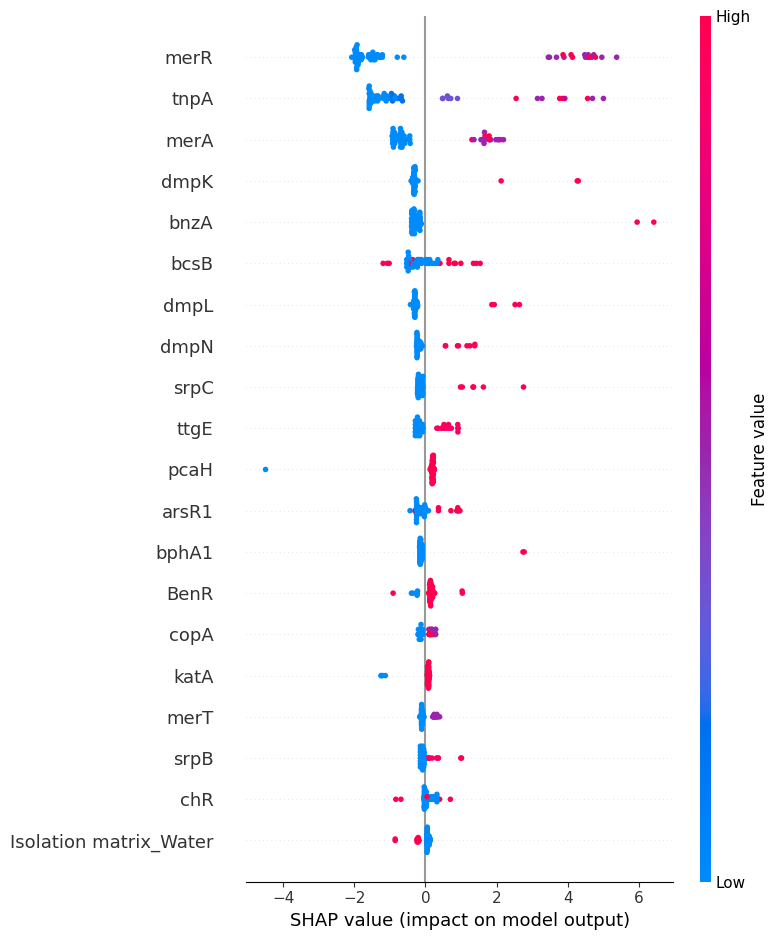

In [ ]:
import shap
explainer = shap.TreeExplainer(xgboost_best)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


In [ ]:
xgboost_best_sqr = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 300, seed = 123, alpha = 0, colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 10, subsample = 0.8)
xgboost_best_sqr.fit(X_train_xgb, y_train_xgb)
y_pred_best_xgb = xgboost_best_sqr.predict(X_test_xgb)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_best_xgb, y_test_xgb)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred_best_xgb, y_test_xgb)))
print("Mean Absolute Percentage Error : " + str(metrics.mean_absolute_percentage_error(y_pred_best_xgb, y_test_xgb)))
print("R2 Score : " + str(metrics.r2_score(y_pred_best_xgb, y_test_xgb)))

In [ ]:
import shap
explainer = shap.TreeExplainer(xgboost_best_sqr)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

We have seen that the tuning of the hyperparameters has improved the performance of both  models.

##Residual analysis

For most models, residuals should express a random behavior with certain properties (like, e.g., being concentrated around 0). If we find any systematic deviations from the expected behavior, they may signal an issue with a model (for instance, an omitted explanatory variable or a wrong functional form of a variable included in the model).



Text(0, 0.5, 'Residuals')

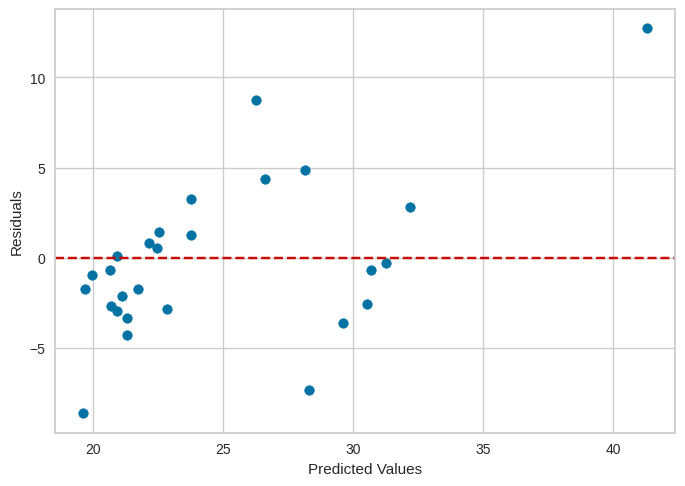

In [ ]:
#We will create a residual plot for the rf_best model
residuals_best_rf = y_test_rf - y_pred_best_rf
plt.scatter(y_pred_best_rf, residuals_best_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

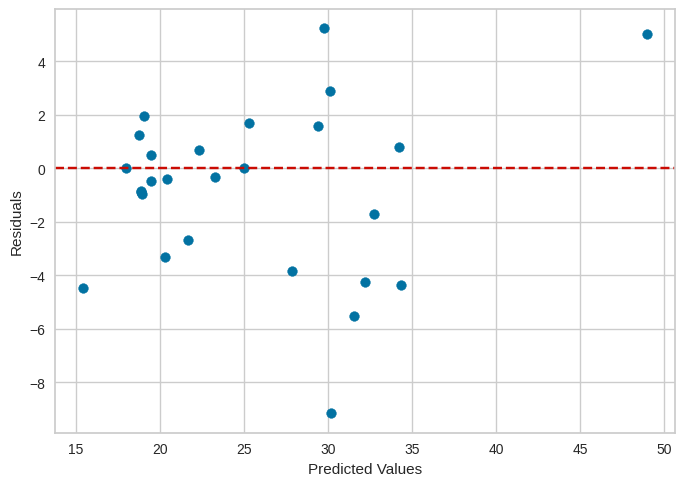

In [ ]:
#Now, we will also do a residual plot for the xgboost_best model
residuals_best_xgb = y_test_xgb - y_pred_best_xgb
plt.scatter(y_pred_best_xgb, residuals_best_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

For a residual plot to show that our model is trustworthy, the scatter points should be distributed across the plot randomly, without a visible pattern. In both of our scatter residual plots, we can not see some defined pattern, but we see that the residuals have different variances on different points of the fitted values. This is called **heteroscedasticity**.

Heteroscedasticity occurs in datasets where have a large range of values. A common explanation for heteroscedascisity is that the error variance changes proportionally with a factor.

In order to see if our dataset has heteroscedastisity, we could perform an statisticall test called the **Breuch-Pagan test**. ***HOWEVER, AS WE HAVE ENCODED THE CATEGORICAL VARIABLES WITH ONE-HOT ENCODING, THIS WILL AFFECT THE TEST. MAYBE FIND ANOTHER TEST??***


In [ ]:
#We need to first drop the constant columns in X_test_rf and X_test_xgb, bc this could cause problems in the test
# Identify constant columns
constant_columns_X_test_rf = [col for col in X_test_rf.columns if X_test_rf[col].nunique() == 1]
constant_columns_X_test_xgb = [col for col in X_test_xgb.columns if X_test_xgb[col].nunique() == 1]

X_test_rf_noconst = X_test_rf.drop(columns=constant_columns_X_test_rf)
X_test_xgb_noconst = X_test_xgb.drop(columns=constant_columns_X_test_xgb)

from statsmodels.tools.tools import add_constant
X_test_rf_noconst = add_constant(X_test_rf_noconst, has_constant="add")
X_test_xgb_noconst = add_constant(X_test_xgb_noconst, has_constant="add")

In [ ]:
#Now the same for the xboost model
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals_best_rf, X_test_rf)

# Print the test results
print("Breusch-Pagan Test:")
print("Lagrange multiplier statistic:", bp_test[0])
print("p-value:", bp_test[1])
print("F-statistic:", bp_test[2])

Breusch-Pagan Test:
Lagrange multiplier statistic: 27.0
p-value: 1.0
F-statistic: nan


In [ ]:
#Now the same for the xboost model
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals_best_xgb, X_test_xgb_noconst)

# Print the test results
print("Breusch-Pagan Test:")
print("Lagrange multiplier statistic:", bp_test[0])
print("p-value:", bp_test[1])
print("F-statistic:", bp_test[2])

Breusch-Pagan Test:
Lagrange multiplier statistic: 27.0
p-value: 1.0
F-statistic: nan


As we can not find a way to perform the breusch pagan test in this RF model, i will assume we have heteroscedasticity and try to fix it, and see if this improves the model and the residual plot.
###Trying with log


In [ ]:
#We will convert the Bioremediation potential feature transforming it into its log
df_encoded_log = df_encoded.copy()
df_encoded_log['Bioremediation potential'] = np.log(df_encoded['Bioremediation potential'])

In [ ]:
X_log = df_encoded_log.drop(columns=[target])#, target_classification])
y_log = df_encoded_log[target]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.45, random_state=42)

rf_log = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_leaf=1, min_samples_split=2, max_features='sqrt')
rf_log.fit(X_train_log, y_train_log)
y_pred_rf_log = rf_log.predict(X_test_log)
mse = mean_squared_error(y_test_log, y_pred_rf_log)
#accuracy = accuracy_score(y_test_log, y_pred_best_log)
mae = metrics.mean_absolute_error(y_test_log, y_pred_rf_log)
mape = metrics.mean_absolute_percentage_error(y_test_log, y_pred_rf_log)
r2 = metrics.r2_score(y_test_log, y_pred_rf_log)

print("RANDOM FOREST METRICS")
print(f"Mean Squared Error for Regression Model: {mse:.2f}")
#print(f"Accuracy for Regression Model: {accuracy:.2f}")
print(f"Mean Absolute Error for Regression Model: {mae:.2f}")
print(f"Mean Absolute Percentage Error for Regression Model: {mape:.2f}")
print(f"R2 Score for Regression Model: {r2:.2f}")

xgboost_log = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 300, seed = 123, alpha = 0, colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 10, subsample = 0.8)
xgboost_log.fit(X_train_log, y_train_log)
y_pred_xgb_log = xgboost_log.predict(X_test_log)
from sklearn.metrics import mean_absolute_error

print("XGBOOST METRICS")
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_xgb_log, y_test_log)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred_xgb_log, y_test_log)))
print("Mean Absolute Percentage Error : " + str(metrics.mean_absolute_percentage_error(y_pred_xgb_log, y_test_log)))
print("R2 Score : " + str(metrics.r2_score(y_pred_xgb_log, y_test_log)))

RANDOM FOREST METRICS
Mean Squared Error for Regression Model: 0.03
Mean Absolute Error for Regression Model: 0.13
Mean Absolute Percentage Error for Regression Model: 0.04
R2 Score for Regression Model: 0.70


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:14:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBOOST METRICS
Mean Absolute Error : 0.10156328566672468
Mean Squared Error : 0.018619625445750715
Mean Absolute Percentage Error : 0.03173678988445627
R2 Score : 0.7390935320413539


Text(0, 0.5, 'Residuals')

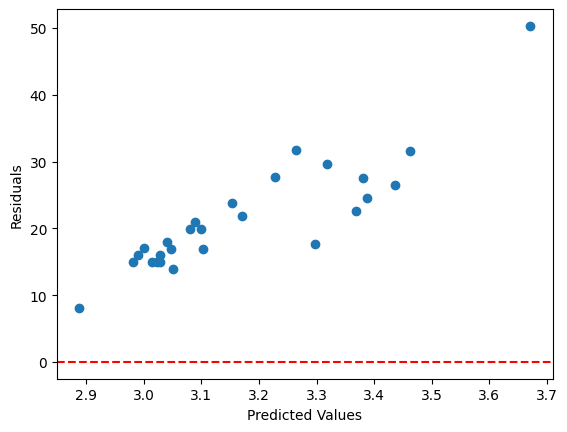

In [ ]:
#We will create a residual plot for the rf_log model
residuals_rf_log = y_test_rf - y_pred_rf_log
plt.scatter(y_pred_rf_log, residuals_rf_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

##Cross validation

###Cross validation in RF

In [ ]:
X = df_encoded.drop('Bioremediation potential', axis=1)  # Features
y = df_encoded['Bioremediation potential']  # Target

In [ ]:
from sklearn.ensemble import RandomForestRegressor

mymodel = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']

scores = {}  # Store scores for each metric

for metric in scoring_metrics:
    # Multiply by -1 for negative metrics (e.g., neg_mean_squared_error) to get positive scores
    scores[metric] = -1 * cross_val_score(mymodel, X, y, cv=5, scoring=metric) if metric.startswith('neg_') else cross_val_score(mymodel, X, y, cv=5, scoring=metric)
    print(f"{metric} scores:\n", scores[metric])
    print(f"Average {metric} score:")
    print(scores[metric].mean())



neg_mean_squared_error scores:
 [ 24.62633333  14.63815833 125.32538333   9.72850833  17.72591818]
Average neg_mean_squared_error score:
38.4088603030303
neg_mean_absolute_error scores:
 [3.16       3.06583333 6.32166667 2.18916667 3.25909091]
Average neg_mean_absolute_error score:
3.599151515151515
neg_mean_absolute_percentage_error scores:
 [0.10822098 0.1307143  0.15268004 0.07949213 0.19889525]
Average neg_mean_absolute_percentage_error score:
0.13400053941393925
r2 scores:
 [0.46745878 0.67349833 0.06103771 0.74454683 0.69858964]
Average r2 score:
0.5290262571282318


#supercorrelation matrix


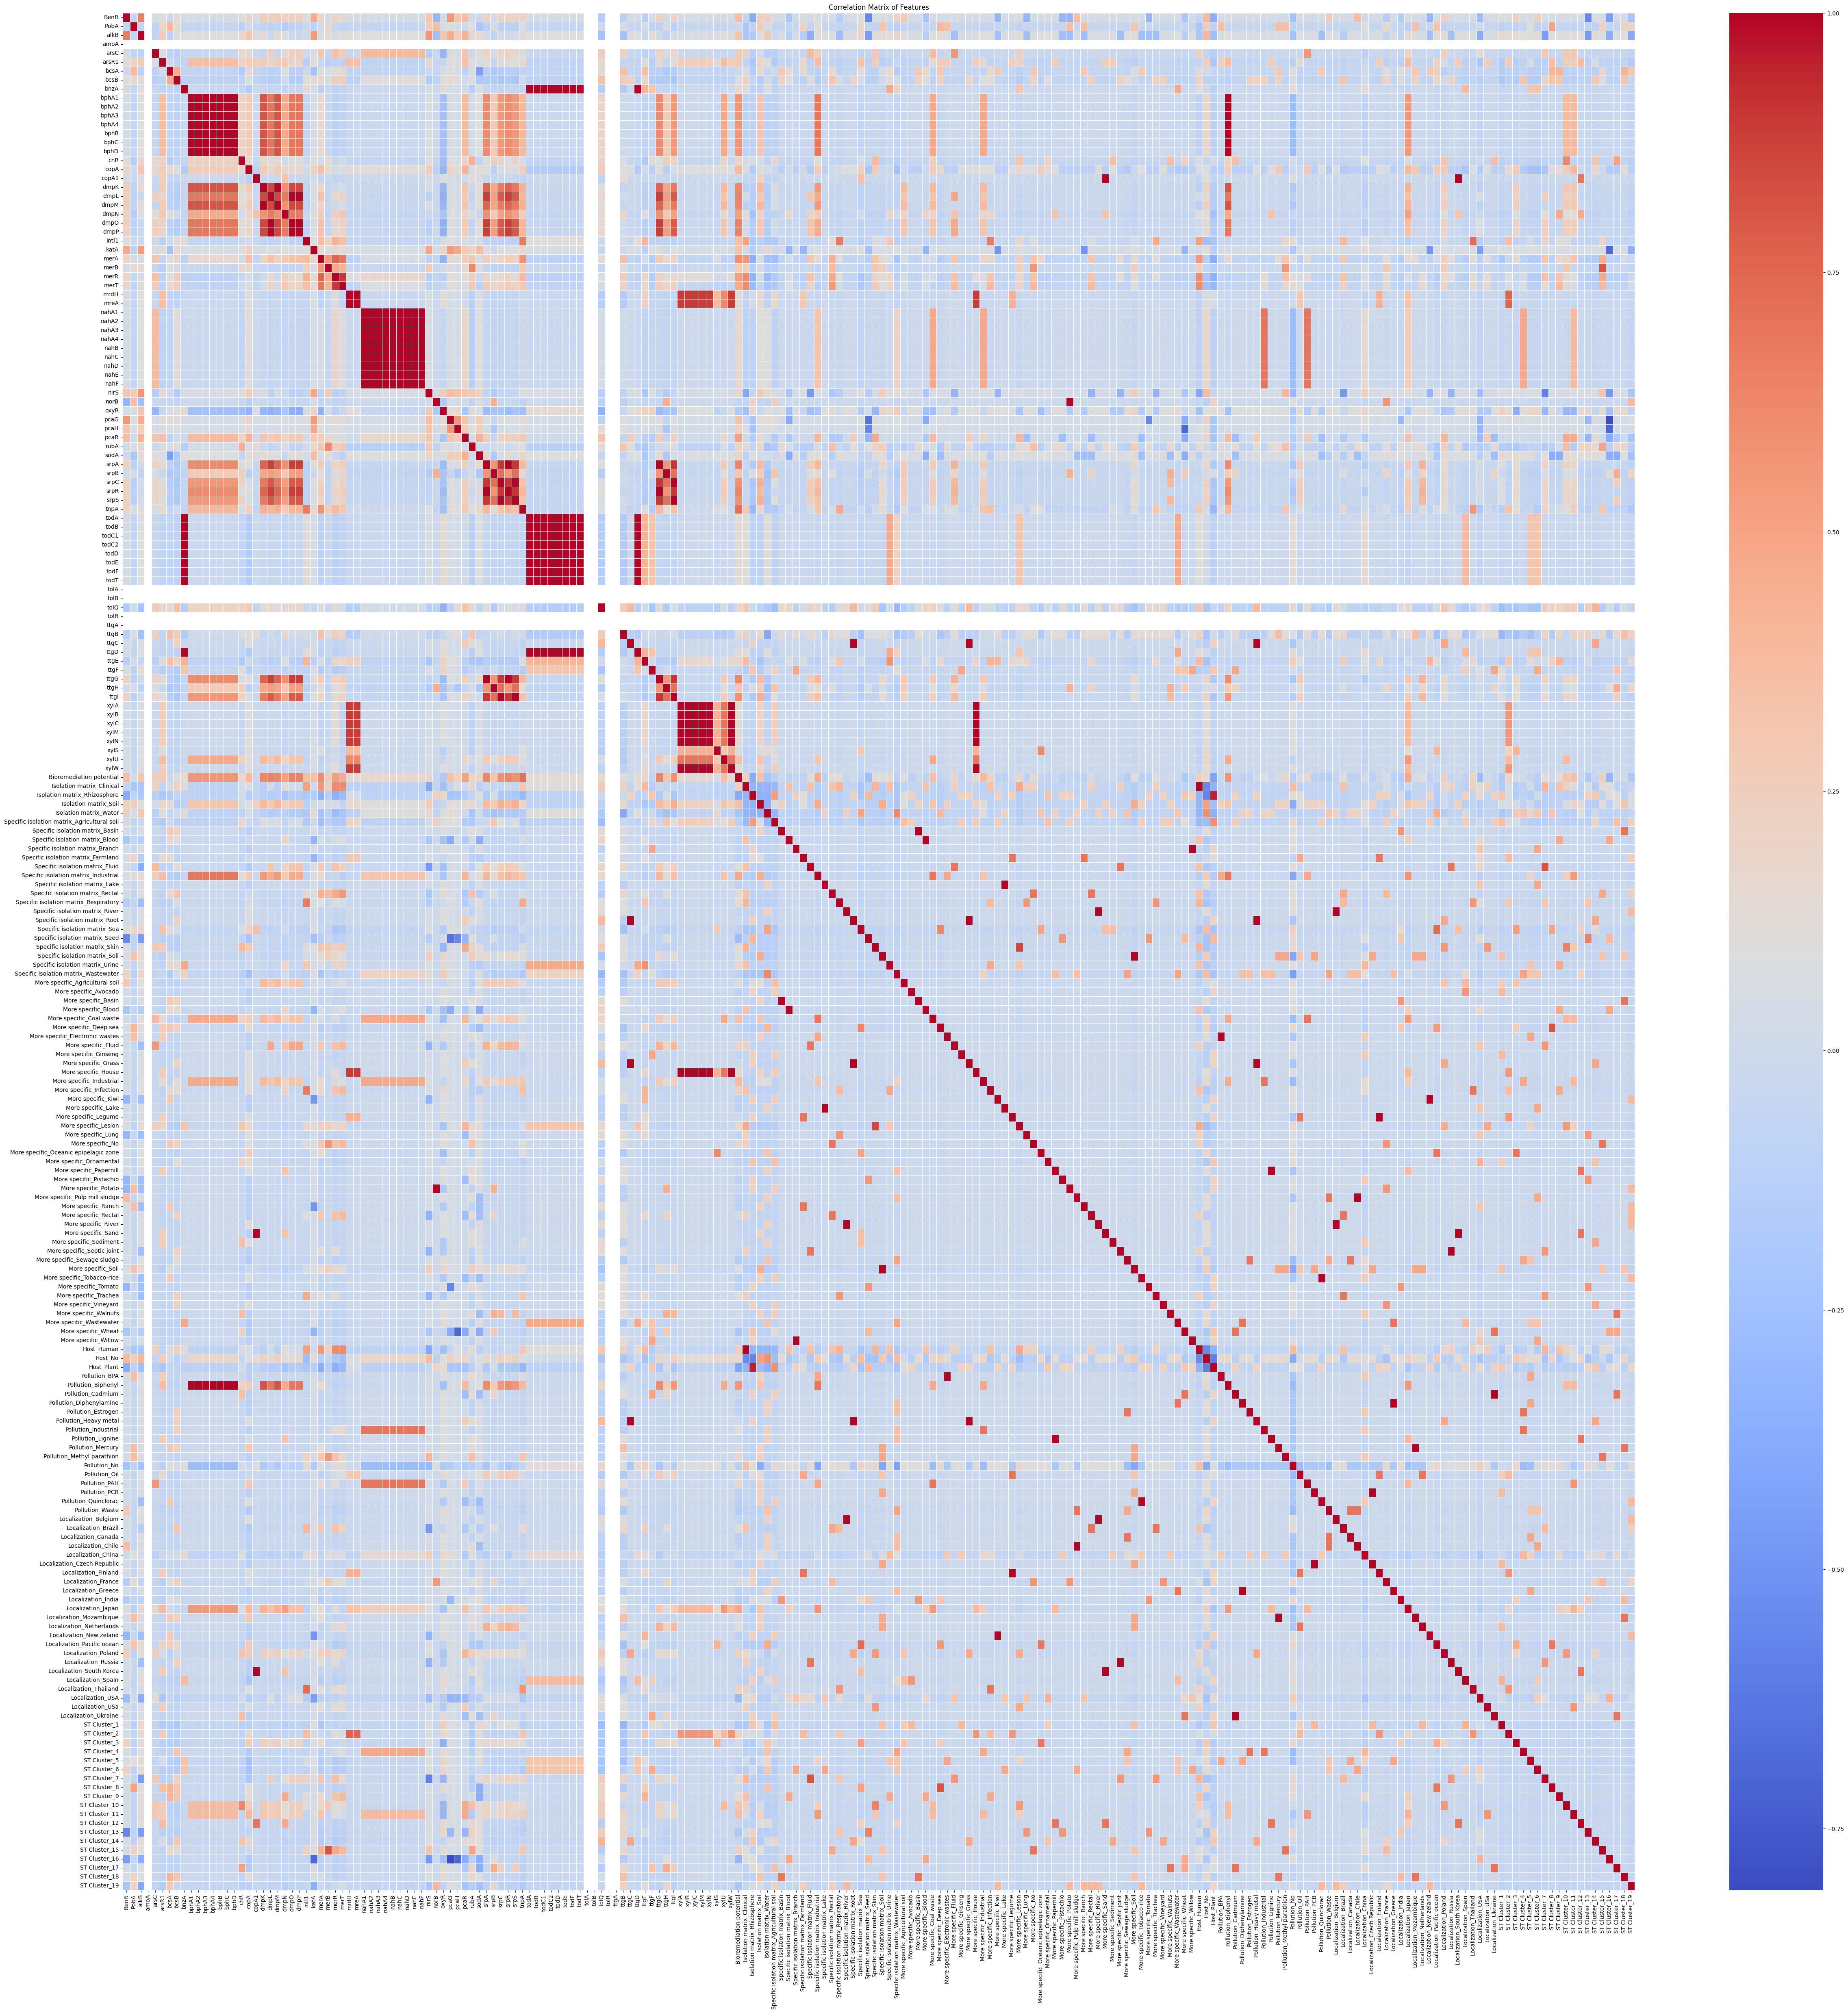

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix_w_out = df_encoded.corr(method='pearson')
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix_w_out, vmin=None, vmax=None, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()